In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def integrated(t, a = 0.255):
    return 1 - (1 - t) / (1 + a)

In [3]:
class TopTaxRate:
    def __init__(
        self,
        eti=0.2,
        pareto=2.25,
        income_shifting=0.5,
        alternative_tax_rate=integrated(0.26),
    ):
        self.eti = eti
        self.pareto = pareto
        self.income_shifting = income_shifting
        self.alternative_tax_rate = alternative_tax_rate

    def income(self, t):
        """Taxable income, and shifted amount"""
        i0 = 1.0
        i = (1 - t) ** (self.eti * self.pareto)
        j = self.income_shifting * (i0 - i)
        return i, j

    def revenue(self, t):
        """Tax revenue for tax rate t"""
        i, j = self.income(t)
        return (t * i) + (self.alternative_tax_rate * j)

    def revenue_maximizing_rate(self):
        """Revenue maximizing tax rate according to Saez"""
        return 1 / (1 + self.eti * self.pareto)

    def efficiency(self, t, s):
        """Efficiency of a tax increase t -> s"""
        dr = self.revenue(t) - self.revenue(s)
        dr0 = self.income(s)[0] * (t - s)
        return dr / dr0

    def self_financing(self, t, s):
        """Self financing rate of a tax cut t -> s"""
        return 1 - self.efficiency(s, t)

In [49]:
#                ETI, pareto, tulonmuunto
print(TopTaxRate(0.16, 2.25, 0.7).self_financing(0.57, 0.52))
print(TopTaxRate(0.16, 2.25, 0.5).self_financing(0.57, 0.52))
print(TopTaxRate(0.20, 2.25, 0.7).self_financing(0.57, 0.52))
print(TopTaxRate(0.20, 2.25, 0.5).self_financing(0.57, 0.52))
print(TopTaxRate(0.15, 2.90, 0.0).self_financing(0.57, 0.52))
print(TopTaxRate(0.4, 2.90, 0.5).self_financing(0.57, 0.52))
print(TopTaxRate(0.4, 2.90, 0.7).self_financing(0.57, 0.52))

0.18803730787193418
0.25434282896337157
0.23622169129449877
0.31951793985092947
0.5097424803508287
0.8569398020672111
0.6335411697895009


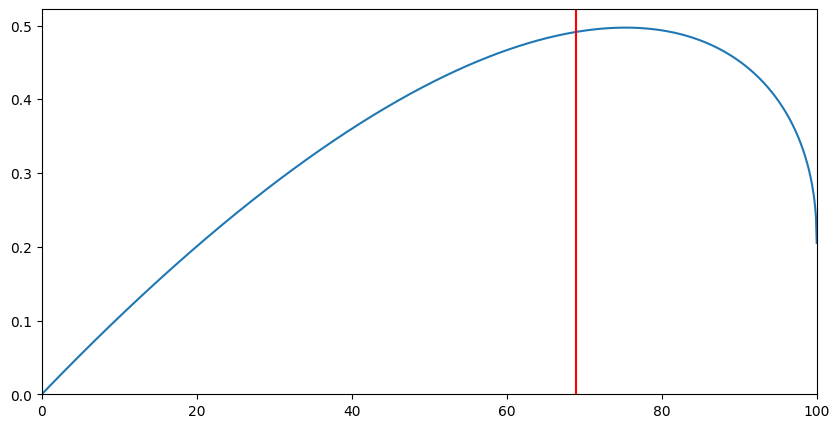

In [40]:
ttr = TopTaxRate(0.20, 2.25, 0.5)

t = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 5))
plt.plot(100 * t, ttr.revenue(t))
plt.axvline(x=100 * ttr.revenue_maximizing_rate(), color="red")
plt.xlim(0, 100)
plt.ylim(0, None)
plt.show()

In [39]:
print(ttr.self_financing(0.57, 0.52))
#print(ttr.self_financing(integrated(0.57), integrated(0.47)))

0.31951793985092947
